In [1]:
# https://www.kaggle.com/code/dettaup/delhi-air-quality-prediction/notebook
#  Kaggle Delhi AQI Prediction Link

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the Dataset
dataset = pd.read_csv('delhi_aqi.csv')
dataset.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [4]:
dataset.tail()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
18771,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
18772,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
18773,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
18774,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47
18775,2023-01-24 08:00:00,1134.87,8.61,56.89,80.11,110.63,123.76,140.26,5.51


In [5]:
dataset.shape

(18776, 9)

In [6]:
# checking the missing value
dataset.isnull().sum()

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   pm2_5   18776 non-null  float64
 7   pm10    18776 non-null  float64
 8   nh3     18776 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [8]:
# Converting the date column's datatype to datetime
dataset['date'] = pd.to_datetime(dataset['date'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    18776 non-null  datetime64[ns]
 1   co      18776 non-null  float64       
 2   no      18776 non-null  float64       
 3   no2     18776 non-null  float64       
 4   o3      18776 non-null  float64       
 5   so2     18776 non-null  float64       
 6   pm2_5   18776 non-null  float64       
 7   pm10    18776 non-null  float64       
 8   nh3     18776 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 1.3 MB


In [9]:
dataset.describe()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,18776,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000
mean,2021-12-23 14:35:34.384320256,2929.228628,33.660702,66.221299,60.346239,66.693633,238.130309,300.092966,25.109815
min,2020-11-25 01:00:00,260.350000,0.000000,4.280000,0.000000,5.250000,11.830000,15.070000,0.000000
25%,2021-06-09 14:45:00,1068.120000,0.680000,33.930000,0.340000,34.810000,84.440000,118.797500,9.630000
50%,2021-12-22 04:30:00,1842.500000,5.250000,54.150000,27.180000,52.930000,157.445000,209.705000,17.480000
75%,2022-07-07 18:15:00,3685.000000,35.760000,83.630000,92.980000,82.020000,313.000000,387.965000,30.400000
max,2023-01-24 08:00:00,21148.680000,500.680000,460.620000,801.090000,579.830000,1708.090000,1969.930000,287.770000
std,NaN,2854.523506,62.127118,48.527492,80.464932,49.439191,226.533625,267.165827,26.402108


EDA

In [10]:
df = dataset.copy()

Distribution of Dataset

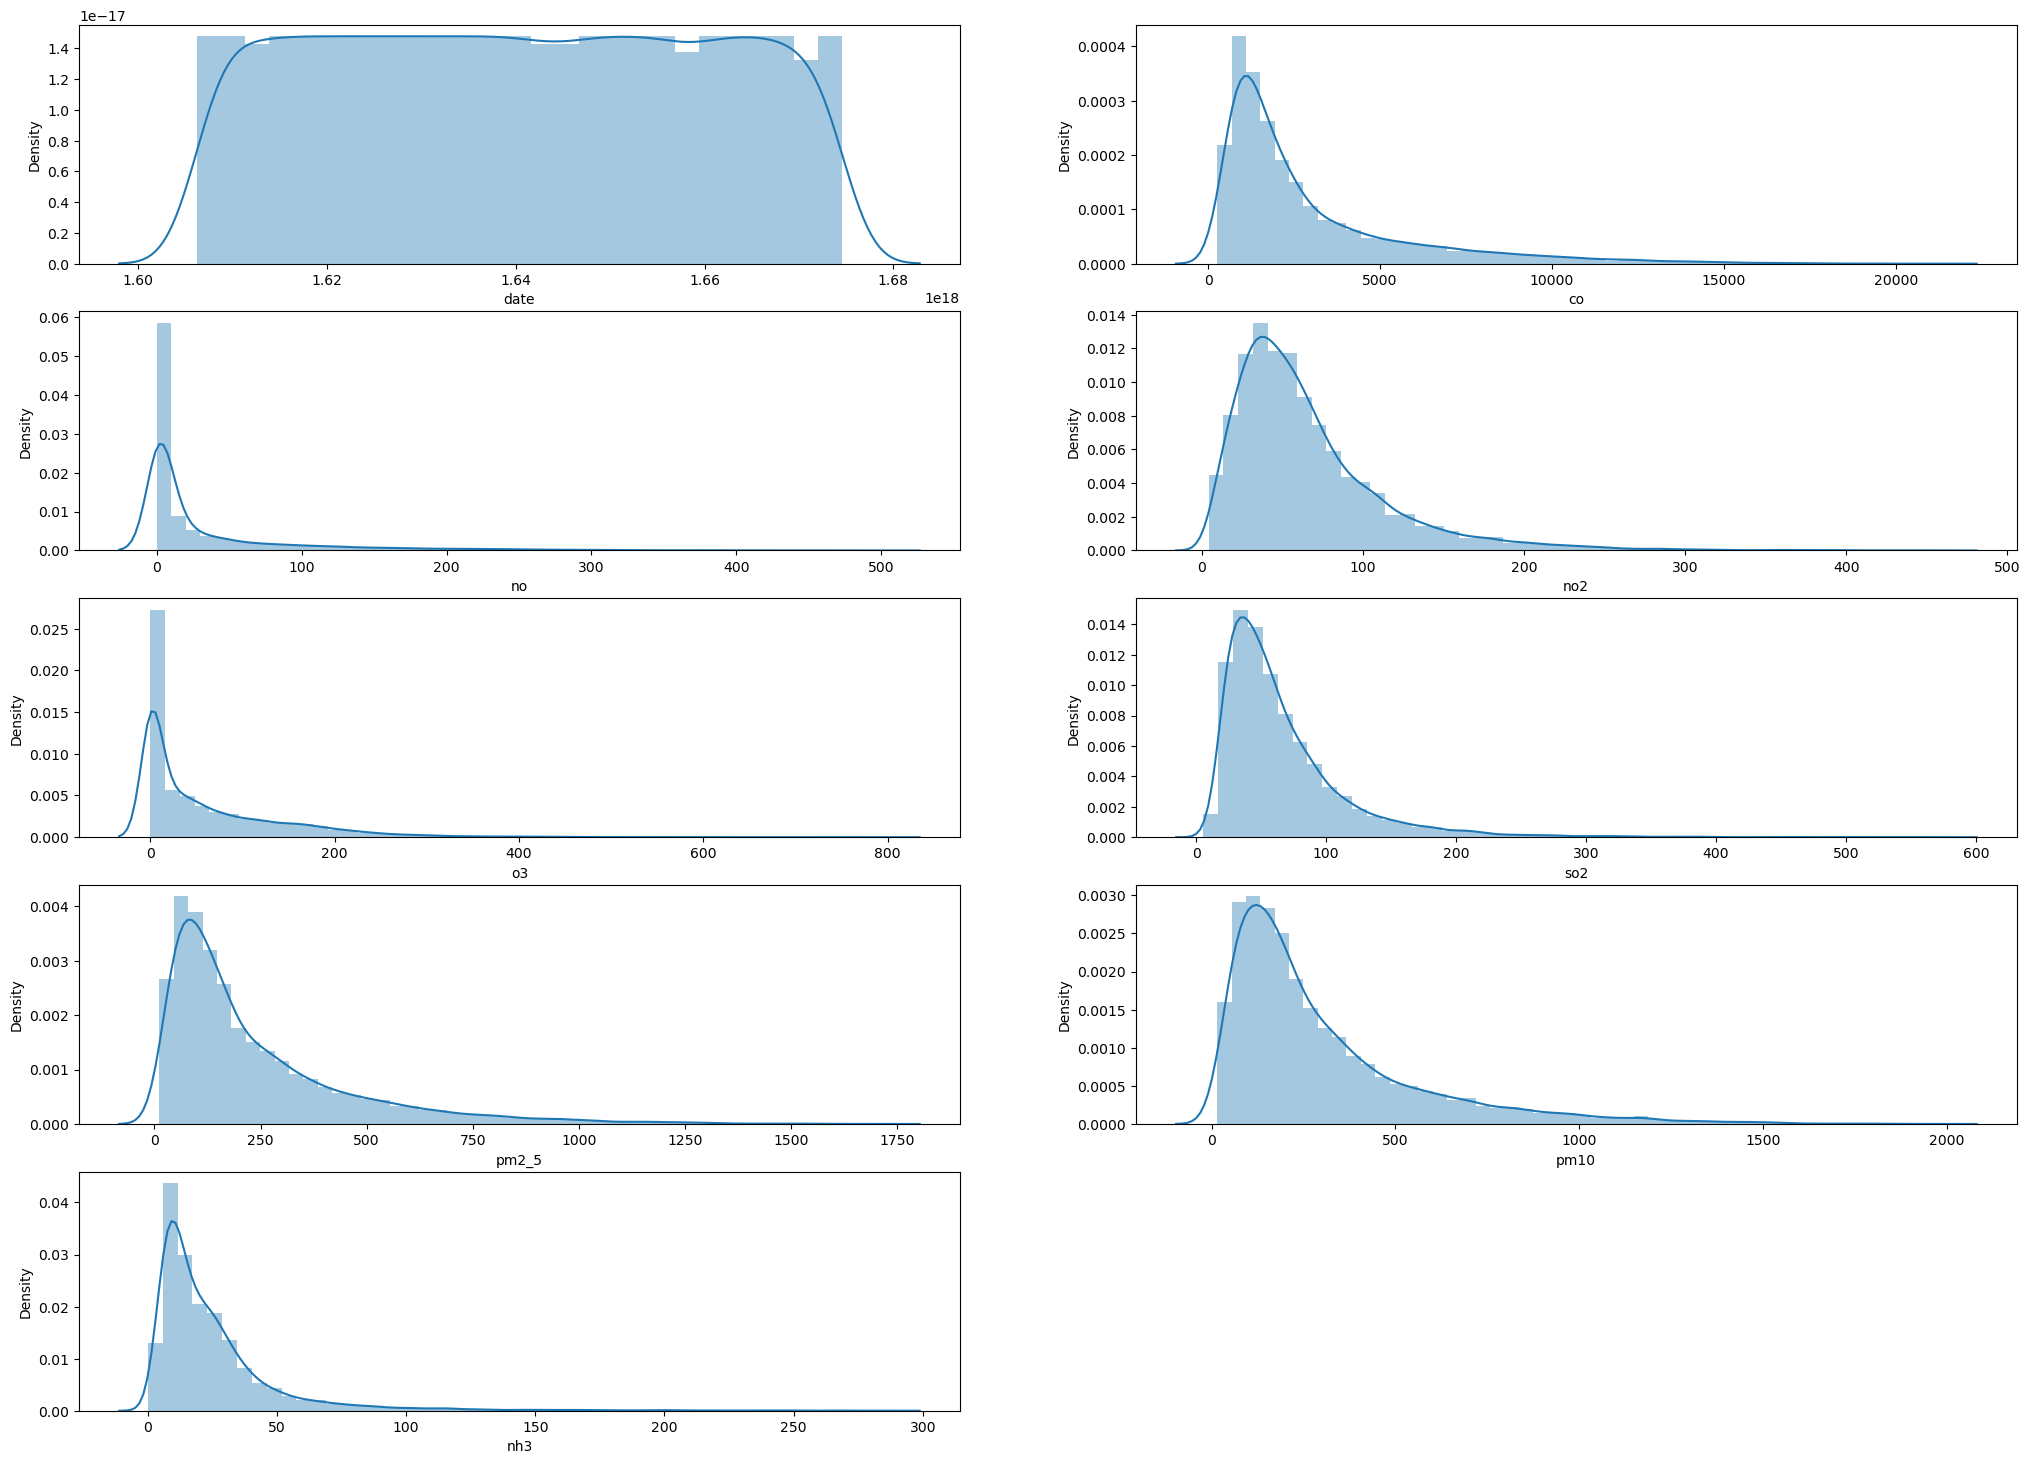

In [11]:
plot=1
plt.figure(figsize=(25,18))
for i in df.columns:
    plt.subplot(5,2,plot)
    sns.distplot(df[i])
    plot = plot+1

plt.show()

Working with the Date column

In [12]:
df['Date'] = df['date'].dt.date
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day
df['Weekday'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,Date,Year,Month,Day,Weekday,hour
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,2020-11-25,2020,11,25,Wednesday,1
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,2020-11-25,2020,11,25,Wednesday,2
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,2020-11-25,2020,11,25,Wednesday,3
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,2020-11-25,2020,11,25,Wednesday,4
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,2020-11-25,2020,11,25,Wednesday,5


In [13]:
# Adding Season column - Summer,Autumn,Winter,Spring
def season_creation(x):
    if x in [2,3,4]:
        season = "Spring"
    elif x in [5,6]:
        season = "Summer"
    elif x in [7,8]:
        season = "Monsoon"
    elif x in [9,10]:
        season = "Autumn"
    elif x in[11,12,1]:
        season = "Winter"
    return season

In [14]:
df["Season"] = df["Month"].apply(season_creation)
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,Date,Year,Month,Day,Weekday,hour,Season
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,2020-11-25,2020,11,25,Wednesday,1,Winter
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,2020-11-25,2020,11,25,Wednesday,2,Winter
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,2020-11-25,2020,11,25,Wednesday,3,Winter
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,2020-11-25,2020,11,25,Wednesday,4,Winter
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,2020-11-25,2020,11,25,Wednesday,5,Winter


Visualizing the Particulate Matter 2.5 on different weekdays in different season

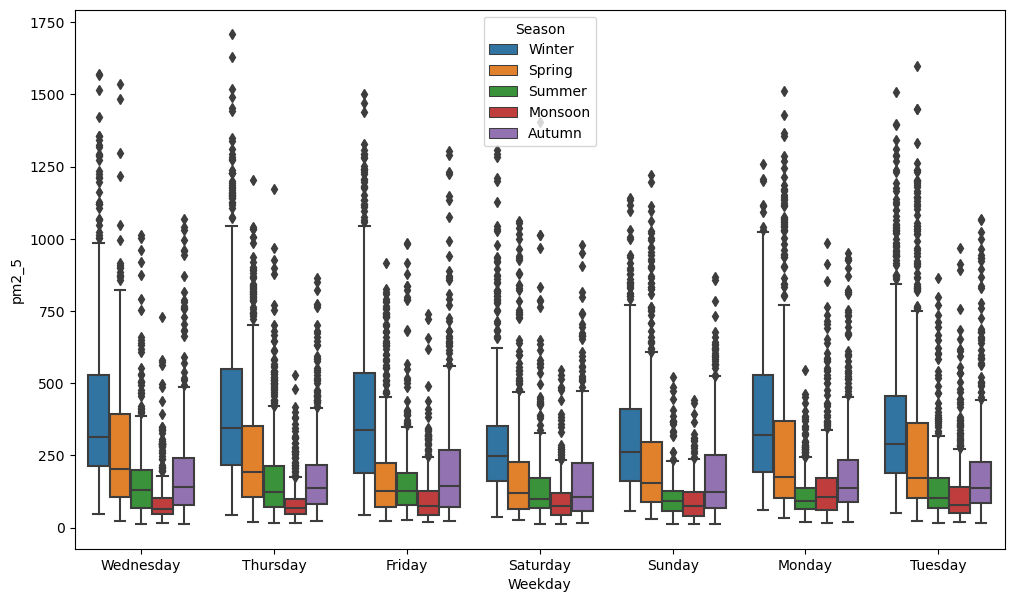

In [15]:
plt.figure(figsize = (12,7))
sns.boxplot(x = df['Weekday'], y = df['pm2_5'], hue = df['Season'])
plt.show()

Observations:
    Winter and Spring have the highest PM2.5 which is quite expected.
    Monsoon season have the least PM2.5
    Weekends have less PM2.5

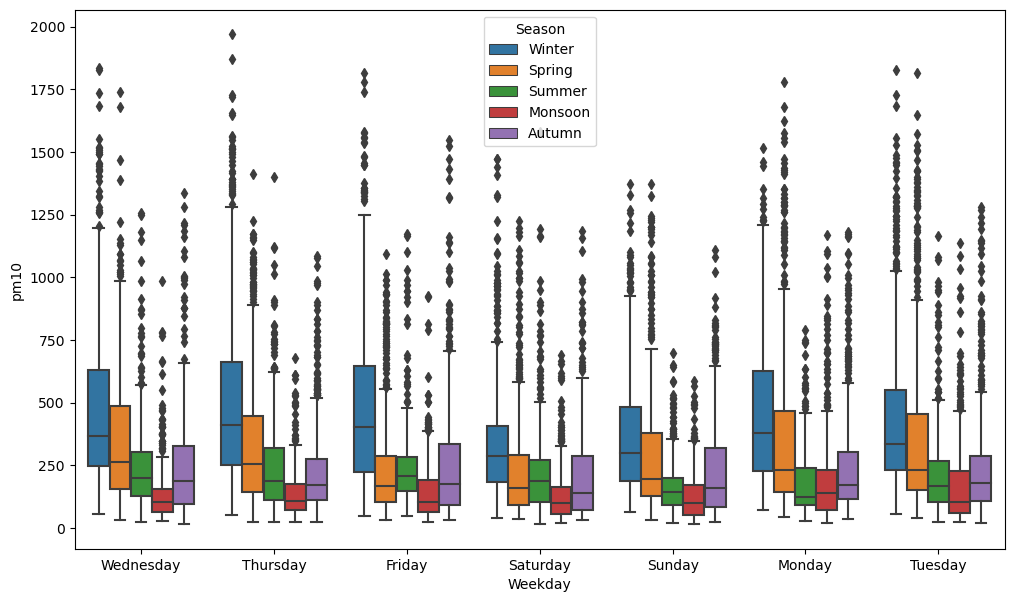

In [16]:
# Visualizing the Particulate Matter 10 on different weekdays in different season
plt.figure(figsize = (12,7))
sns.boxplot(x = df['Weekday'], y = df['pm10'], hue = df['Season'])
plt.show()

Visualize the monthly distribution of pollutants

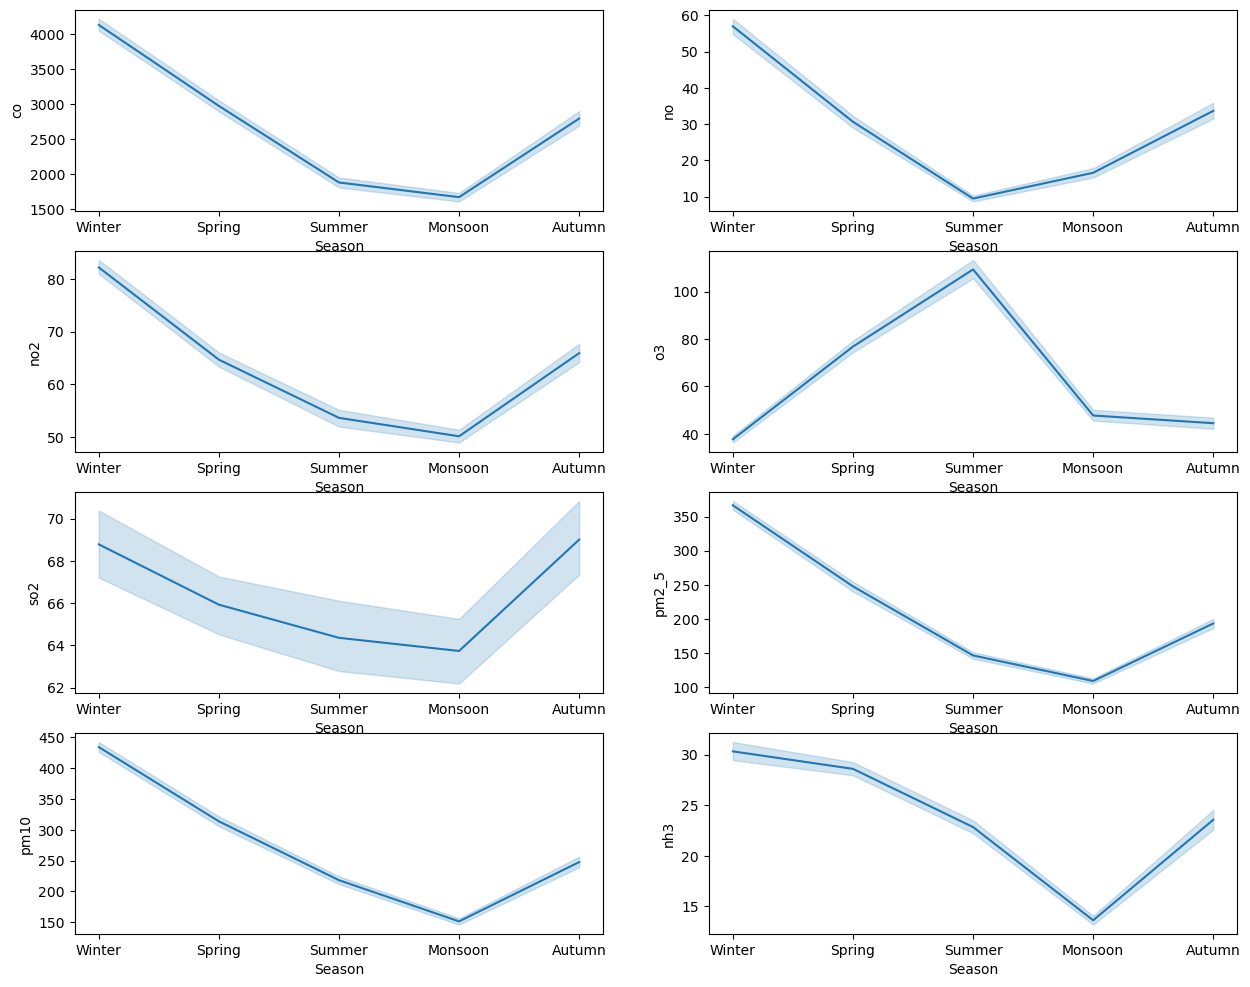

In [17]:
list1 = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
plot = 1
plt.figure(figsize =(15,12))
for i in list1:
    plt.subplot(4,2,plot)
    sns.lineplot(x = df['Season'], y = df[i])
    plot = plot+1
plt.show()

Observations :

In winters the level of pollutants is maximum

Ozone is minimum in winters, maximum in summers

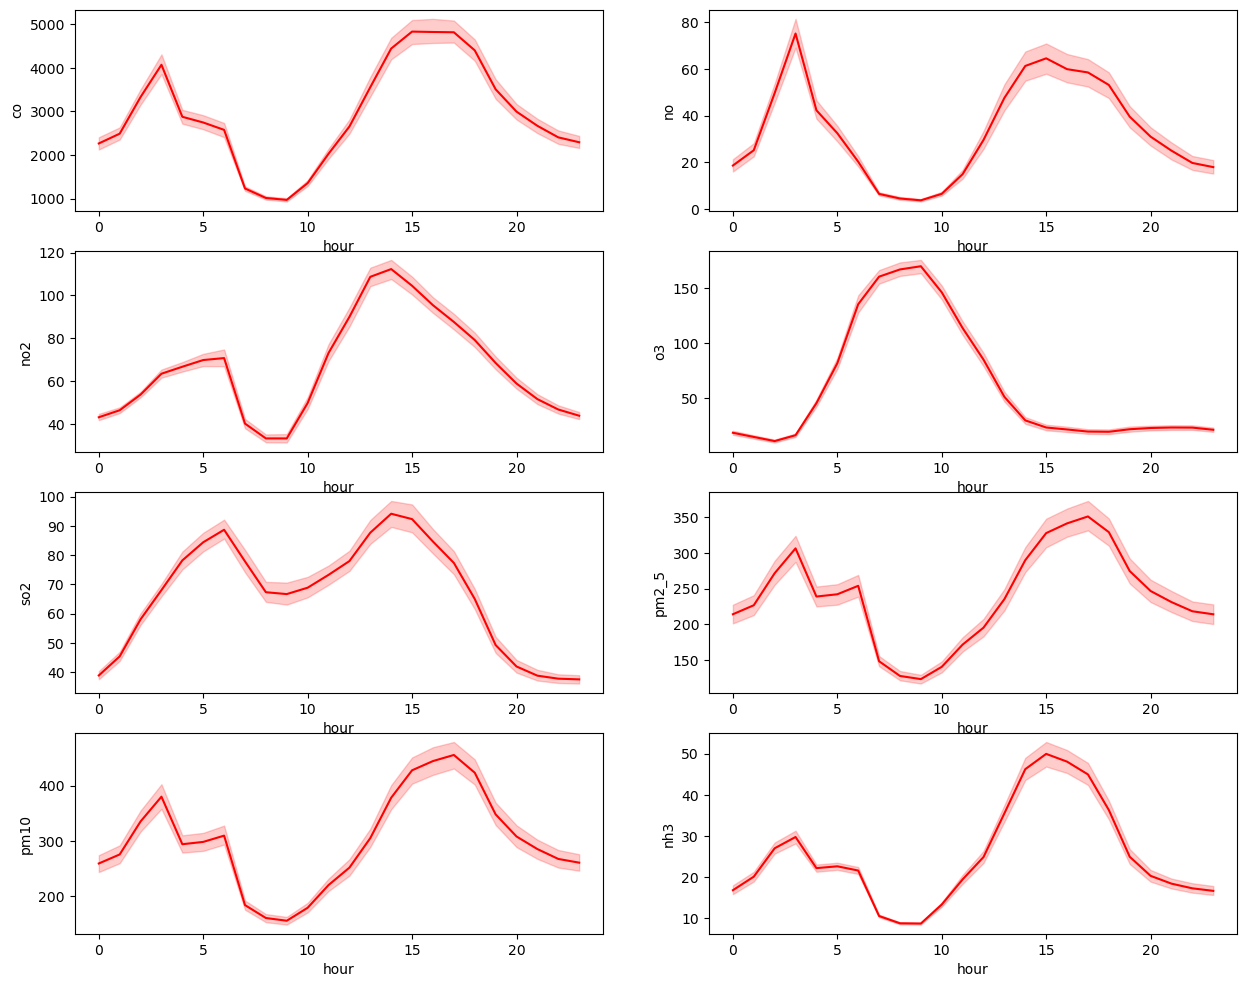

In [18]:
# Hourly Concentration trend of pollutants
list1 = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
plot = 1
plt.figure(figsize =(15,12))
for i in list1:
    plt.subplot(4,2,plot)
    sns.lineplot(x='hour', y = i, data = df, color = 'r')
    plot = plot+1
plt.show()

Predicting the value of PM2.5 using Prophet Model

In [19]:
dataset.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [20]:
dataset['Date'] = dataset['date'].dt.date

In [21]:
df_pred = dataset[['Date','pm2_5']]
df_pred.head()

,Date,pm2_5
0,2020-11-25,364.61
1,2020-11-25,420.96
2,2020-11-25,463.68
3,2020-11-25,454.81
4,2020-11-25,448.14


In [22]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    18776 non-null  object 
 1   pm2_5   18776 non-null  float64
dtypes: float64(1), object(1)
memory usage: 293.5+ KB


In [23]:
# Converting the data type of Date column
df_pred['Date'] = pd.to_datetime(df_pred['Date'])
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    18776 non-null  datetime64[ns]
 1   pm2_5   18776 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 293.5 KB


In [24]:
df_pred = df_pred.groupby('Date')['pm2_5'].sum().reset_index()
df_pred.head()

,Date,pm2_5
0,2020-11-25,7872.94
1,2020-11-26,4338.10
2,2020-11-27,2781.64
3,2020-11-28,4749.34
4,2020-11-29,7905.16


In [25]:
df_pred1 = df_pred.copy()
df_pred1.set_index('Date', inplace=True)
df_pred1.head()

,pm2_5
Date,
2020-11-25,7872.94
2020-11-26,4338.10
2020-11-27,2781.64
2020-11-28,4749.34
2020-11-29,7905.16


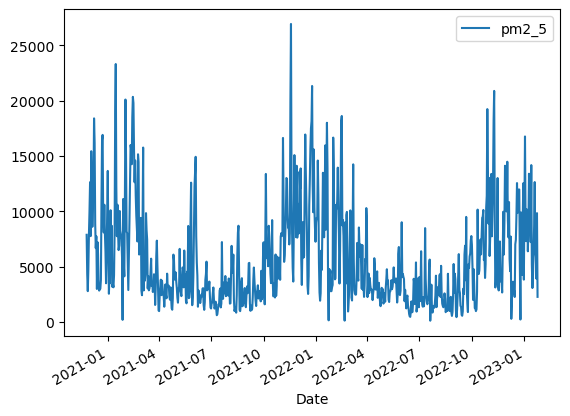

In [26]:
df_pred1.plot()
plt.show()

Durbin Watson Test

In [27]:
import statsmodels.api as sm
sm.stats.durbin_watson(df_pred1)

array([0.20840269])

Decomposition Component - Trend & Seasonality

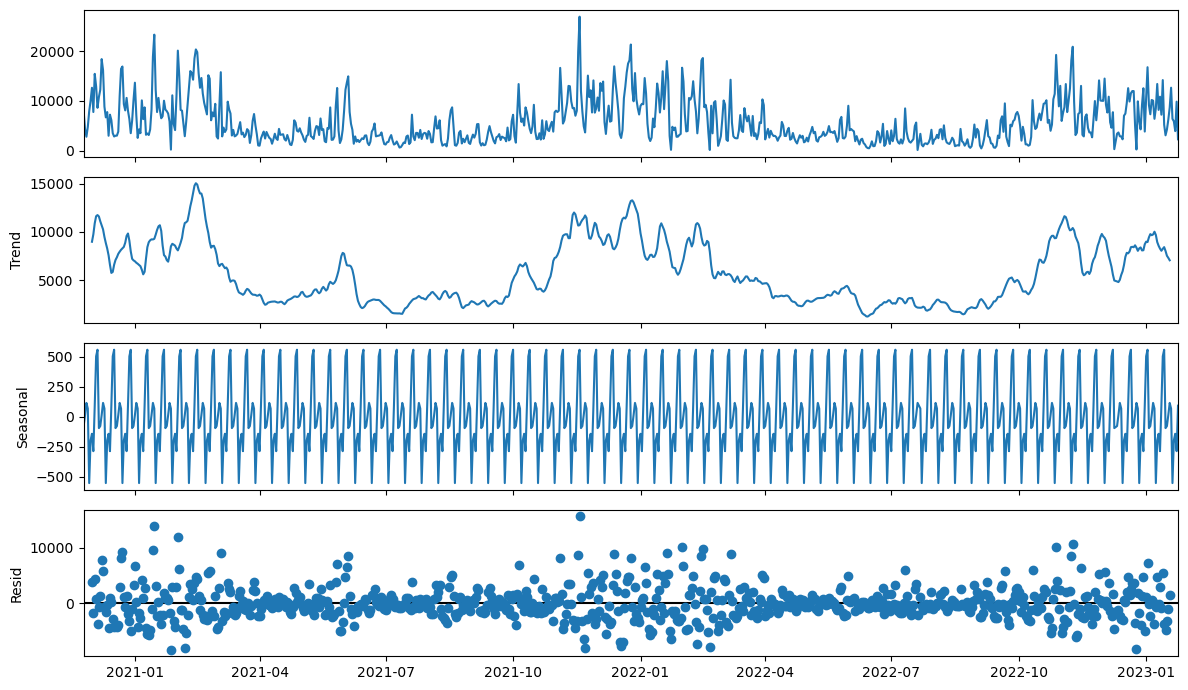

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 12,7
decomposition_additive = seasonal_decompose(df_pred1, model = 'additive', period=12)
decomposition_additive.plot()
plt.show()

In [33]:
pip install prophet


  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/24/2b/834e9a347f2f0161e32a3c6125b8a1ebdf6ac33199a0ed3a0bdf1f0c296f/prophet-1.1.5-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/e0/e2/2ff5e8e06734c1f6f3933274d1eed1ea9e0904bf7a795869a417f5d3de41/cmdstanpy-1.2.2-py3-none-any.whl.metadata
  Obtaining dependency information for holidays>=0.25 from https://files.pythonhosted.org/packages/4d/c1/9190d856fb2c9ca7e5dabab530289bf66d03c0e379096678c0ee210abf75/holidays-0.47-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/75/06/4df55e1b7b112d183f65db9503bff189e97179b256e1ea450a3c365241e0/importlib_resources-6.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for stanio<2.0.0,>=0.4.0 from https://files.pythonhosted.org/packages/55/35/076a5ff427a47613581f6bd7acebfa8d49046a1b78132

In [34]:
import prophet

In [35]:
df_prophet = df_pred.rename(columns={'Date':'ds', 'pm2_5':'y'})                   # Renaming the column names according to Prophet's guidelines
df_prophet

,ds,y
0,2020-11-25,7872.94
1,2020-11-26,4338.10
2,2020-11-27,2781.64
3,2020-11-28,4749.34
4,2020-11-29,7905.16
...,...,...
784,2023-01-20,6378.28
785,2023-01-21,5880.71
786,2023-01-22,3910.64
787,2023-01-23,9829.13


In [36]:
from prophet import Prophet

In [37]:
m = Prophet()
model = m.fit(df_prophet)

16:54:56 - cmdstanpy - INFO - Chain [1] start processing
16:54:56 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [39]:
# Building Time Series Forecasting Model by using FB Prophet model
# Predicting 6 months data

future_data = model.make_future_dataframe(periods = 180, freq='D')

In [40]:
future_data

,ds
0,2020-11-25
1,2020-11-26
2,2020-11-27
3,2020-11-28
4,2020-11-29
...,...
964,2023-07-19
965,2023-07-20
966,2023-07-21
967,2023-07-22


In [41]:
df_prophet.shape

(789, 2)

In [42]:
future_data.shape

(969, 1)

In [43]:
prediction = model.predict(future_data)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-11-25,5893.876526,5929.378039,14456.510597,5893.876526,5893.876526,4090.886048,4090.886048,4090.886048,422.812179,422.812179,422.812179,3668.073869,3668.073869,3668.073869,0.0,0.0,0.0,9984.762574
1,2020-11-26,5892.162306,5833.326943,14484.941576,5892.162306,5892.162306,4227.083893,4227.083893,4227.083893,620.028058,620.028058,620.028058,3607.055835,3607.055835,3607.055835,0.0,0.0,0.0,10119.246199
2,2020-11-27,5890.448086,5367.031807,13717.879377,5890.448086,5890.448086,3579.061974,3579.061974,3579.061974,34.429745,34.429745,34.429745,3544.632229,3544.632229,3544.632229,0.0,0.0,0.0,9469.510060
3,2020-11-28,5888.733866,4223.552191,12308.154801,5888.733866,5888.733866,2485.990465,2485.990465,2485.990465,-995.158643,-995.158643,-995.158643,3481.149108,3481.149108,3481.149108,0.0,0.0,0.0,8374.724332
4,2020-11-29,5887.019647,4492.668981,12440.703405,5887.019647,5887.019647,2541.083484,2541.083484,2541.083484,-875.940664,-875.940664,-875.940664,3417.024148,3417.024148,3417.024148,0.0,0.0,0.0,8428.103130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,2023-07-19,4763.853018,-1550.773532,7205.634121,4755.511757,4773.649520,-2244.840612,-2244.840612,-2244.840612,422.812179,422.812179,422.812179,-2667.652791,-2667.652791,-2667.652791,0.0,0.0,0.0,2519.012406
965,2023-07-20,4762.697641,-1215.222297,7059.442129,4754.245287,4772.585785,-2086.652897,-2086.652897,-2086.652897,620.028058,620.028058,620.028058,-2706.680956,-2706.680956,-2706.680956,0.0,0.0,0.0,2676.044744
966,2023-07-21,4761.542264,-2217.284038,6017.520607,4752.993449,4771.523790,-2712.512051,-2712.512051,-2712.512051,34.429745,34.429745,34.429745,-2746.941796,-2746.941796,-2746.941796,0.0,0.0,0.0,2049.030213
967,2023-07-22,4760.386886,-3360.967061,4868.832209,4751.685548,4770.463723,-3781.655978,-3781.655978,-3781.655978,-995.158643,-995.158643,-995.158643,-2786.497335,-2786.497335,-2786.497335,0.0,0.0,0.0,978.730908


In [44]:
prediction.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [45]:
prediction[['ds','yhat_lower', 'yhat_upper', 'yhat']].tail(180)

,ds,yhat_lower,yhat_upper,yhat
789,2023-01-25,3733.368077,11426.574512,7395.254548
790,2023-01-26,3535.685036,12139.810910,7696.664128
791,2023-01-27,2918.798467,11693.014998,7243.636399
792,2023-01-28,2089.169138,10648.158489,6373.246065
793,2023-01-29,2495.458793,11174.374693,6675.896383
...,...,...,...,...
964,2023-07-19,-1550.773532,7205.634121,2519.012406
965,2023-07-20,-1215.222297,7059.442129,2676.044744
966,2023-07-21,-2217.284038,6017.520607,2049.030213
967,2023-07-22,-3360.967061,4868.832209,978.730908


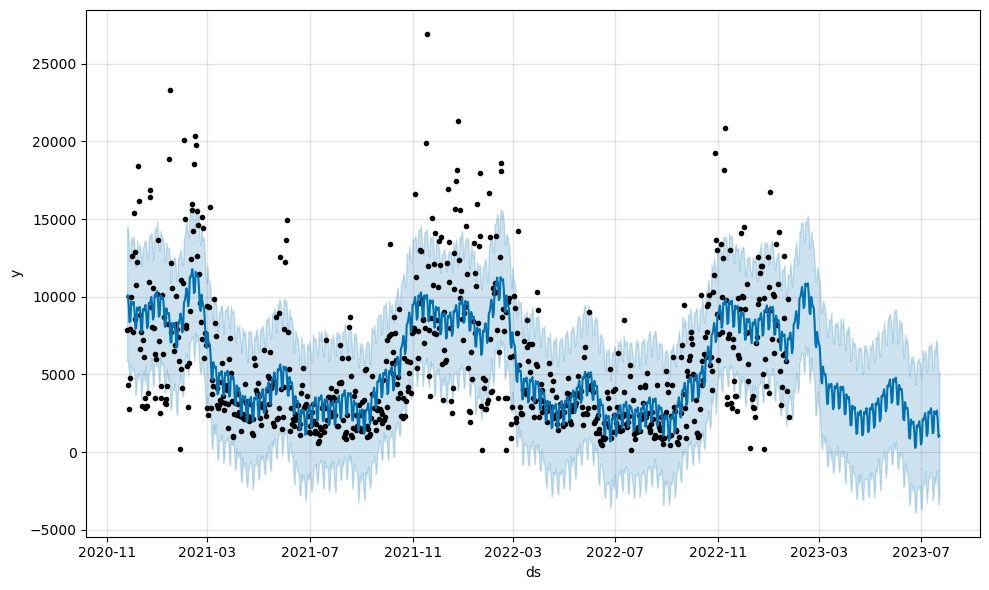

In [46]:
model.plot(prediction)
plt.show()

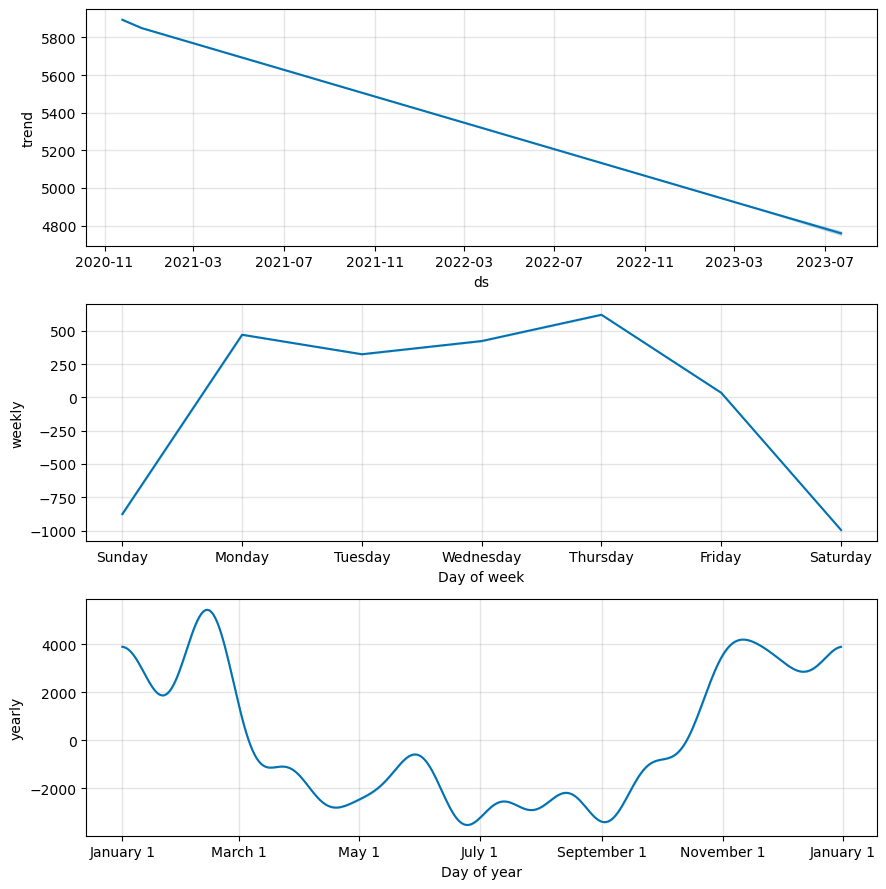

In [47]:
model.plot_components(prediction)
plt.show()

In [48]:
# cross validation :
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, horizon='30 days', period = '15 days', initial='90 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/45 [00:00<?, ?it/s]

16:56:40 - cmdstanpy - INFO - Chain [1] start processing
16:56:40 - cmdstanpy - INFO - Chain [1] done processing
16:56:40 - cmdstanpy - INFO - Chain [1] start processing
16:56:40 - cmdstanpy - INFO - Chain [1] done processing
16:56:40 - cmdstanpy - INFO - Chain [1] start processing
16:56:40 - cmdstanpy - INFO - Chain [1] done processing
16:56:40 - cmdstanpy - INFO - Chain [1] start processing
16:56:40 - cmdstanpy - INFO - Chain [1] done processing
16:56:40 - cmdstanpy - INFO - Chain [1] start processing
16:56:40 - cmdstanpy - INFO - Chain [1] done processing
16:56:41 - cmdstanpy - INFO - Chain [1] start processing
16:56:41 - cmdstanpy - INFO - Chain [1] done processing
16:56:41 - cmdstanpy - INFO - Chain [1] start processing
16:56:41 - cmdstanpy - INFO - Chain [1] done processing
16:56:41 - cmdstanpy - INFO - Chain [1] start processing
16:56:41 - cmdstanpy - INFO - Chain [1] done processing
16:56:41 - cmdstanpy - INFO - Chain [1] start processing
16:56:41 - cmdstanpy - INFO - Chain [1]

Evaluating the predictions

In [49]:
from prophet.diagnostics import performance_metrics

In [50]:
df_performance = performance_metrics(df_cv)
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,1.391805e+07,3730.689617,2661.961434,0.714349,0.418214,0.543070,0.784909
1,4 days,1.548452e+07,3935.037013,2867.178121,0.740923,0.479118,0.593527,0.792869
2,5 days,1.496704e+07,3868.725623,2862.579338,0.757326,0.470026,0.609719,0.815091
3,6 days,1.313480e+07,3624.196976,2731.573482,0.757497,0.444206,0.612424,0.822056
4,7 days,1.442757e+07,3798.364063,2850.201410,1.697480,0.434510,0.655176,0.784909
5,8 days,1.465124e+07,3827.693224,2904.665533,1.667875,0.458543,0.678003,0.746269
6,9 days,1.618290e+07,4022.797854,3028.527388,2.168634,0.467190,0.702203,0.716418
7,10 days,1.659821e+07,4074.090496,3071.807393,1.336114,0.485830,0.698658,0.701493
8,11 days,1.703413e+07,4127.242894,3065.553865,1.379153,0.539217,0.688757,0.733499
9,12 days,1.715478e+07,4141.833229,3084.264657,0.983140,0.588187,0.688537,0.718740


In [51]:
from prophet.plot import plot_cross_validation_metric

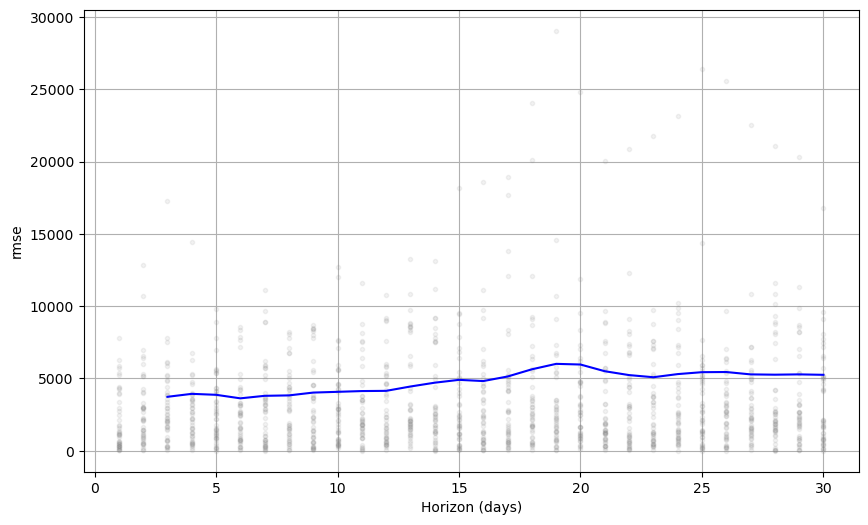

In [52]:
plot_cross_validation_metric(df_cv, metric='rmse')
plt.show()